U= 10010896
s= [345365.13864738   9912.54971616]
Eigenvector: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [1.82371206 0.17692025] 

Illumination level (Lux)     437.58
Color Tempreture            7292.00
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


 PCA :

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0 1]


 Unrotated FA :

[[ 0.78571735 -0.        ]
 [ 0.78571735  0.        ]]
[0 1]


 Varimax FA :

[[0.78571735 0.        ]
 [0.78571735 0.        ]]
[0 1]


C:\Users\vision\AppData\Local\Temp\ipykernel_10532\2875317053.py:71: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_10532\2875317053.py:71: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_10532\2875317053.py:71: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


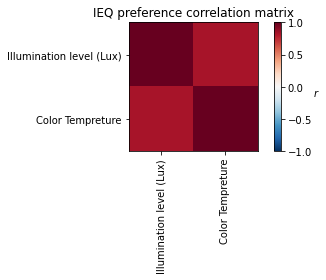

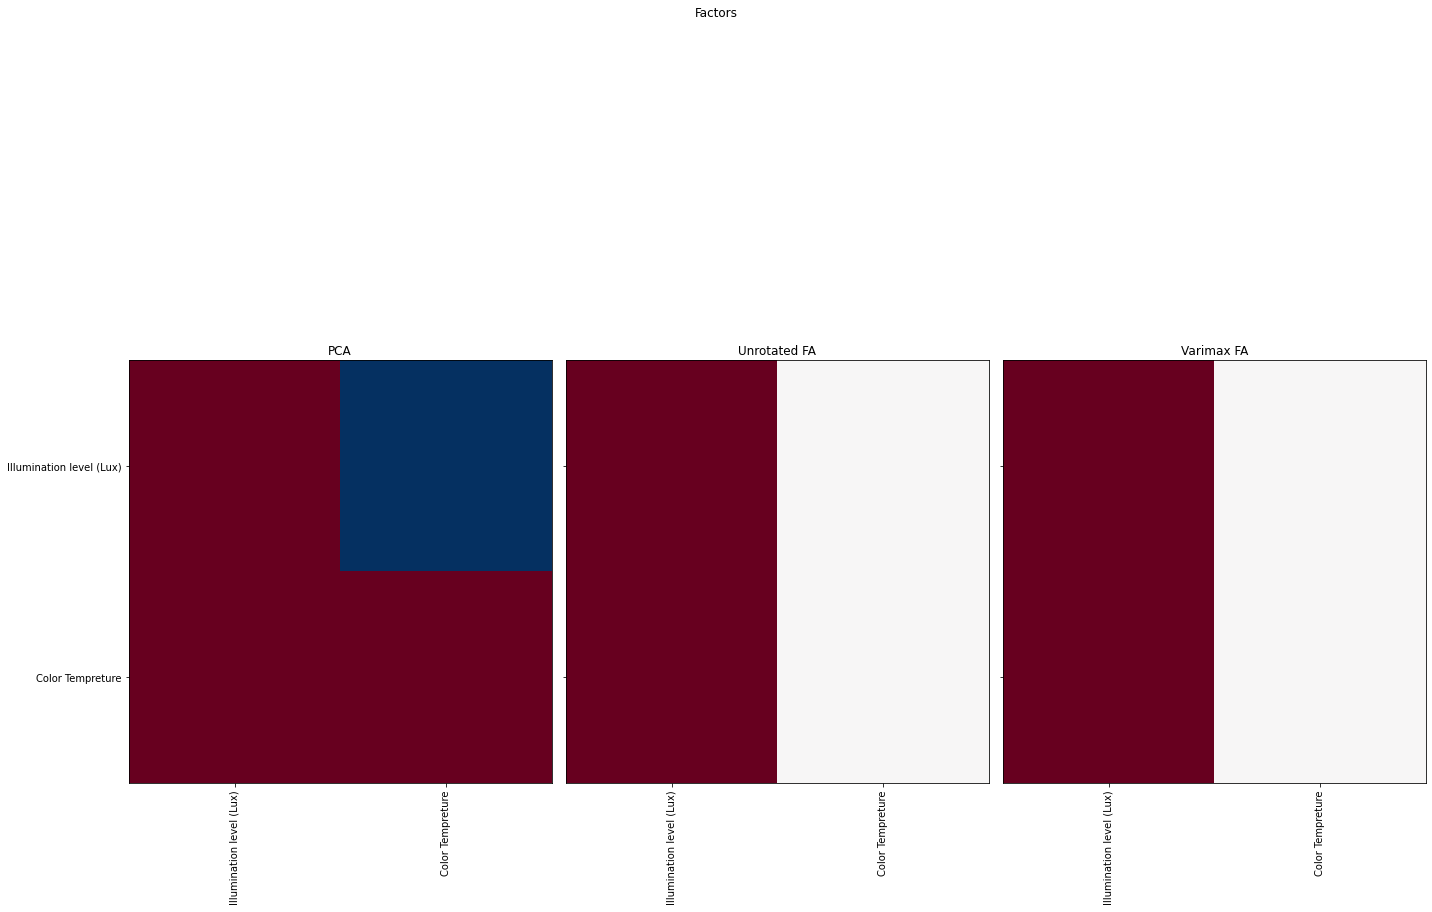

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as alg

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = pd.read_excel (r'C:\Users\vision\Dropbox\ROS\Arch_Plans_Paper\DataSheetsCleaned\all_Measured_Data.xlsx',sheet_name='all_Measured_Data')
df = pd.DataFrame(data, columns= ['Illumination level (Lux)',
                                  'Color Tempreture'])
feature_names = df.iloc[0].T
#print (df)
#df.head()
u, s, vh = alg.svd(df, full_matrices=True)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
pca = PCA(n_components=1)
pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca
             #, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ["Illumination level (Lux)", "Color Tempreture"]
ax.set_xticks([0, 1])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 2

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

